# Bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom

-----------------------------------------------------------------
# Importando Dados

Os dados utilizados nesse exercício podem ser encontrados em: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset <br>
São informações sobre pessoas que tiveram ou não derrame cerebral, que podem ajudar a predição dessa doença.

In [2]:
dataset = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')
pd.set_option("display.precision", 2)
dataset_resumed = dataset.drop(['id'], axis=1)

A seguir podemos ver algumas informações relativas as quantidades de cada informação contida na tabela. É possivel notar algumas informações relevantes como, por exemplo, o genêro que mais aparece nos dados é o feminino, a maioria das pessoas são casadas, moram na cidade, trabalham em instituições privadas, e nunca fumaram.

In [3]:
print("Informações de frequência, e contagem: ")
dataset_stats = dataset_resumed.describe(include=object)
print(dataset_stats)

Informações de frequência, e contagem: 
        gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892


A seguir podemos ver mais algumas informações sobre os dados contidos na tabela, mas as informações a seguir possuem um caráter mais estatistico como a média, o desvio padrão, os valores mínimos e máximos, etc.

In [4]:
print("Informações estatísticas: ")
dataset_stats = dataset_resumed.describe()
print(dataset_stats)

Informações estatísticas: 
           age  hypertension  heart_disease  avg_glucose_level      bmi  \
count  5110.00        5110.0        5110.00            5110.00  4909.00   
mean     43.23           0.1           0.05             106.15    28.89   
std      22.61           0.3           0.23              45.28     7.85   
min       0.08           0.0           0.00              55.12    10.30   
25%      25.00           0.0           0.00              77.25    23.50   
50%      45.00           0.0           0.00              91.88    28.10   
75%      61.00           0.0           0.00             114.09    33.10   
max      82.00           1.0           1.00             271.74    97.60   

        stroke  
count  5110.00  
mean      0.05  
std       0.22  
min       0.00  
25%       0.00  
50%       0.00  
75%       0.00  
max       1.00  


Abaixo estão as mesmas informações, mas agora com apenas as pessoas que tiveram pelo menos 1 derrame cerebral.

In [5]:
derrames = dataset_resumed[dataset_resumed["stroke"] > 0]
derrames = derrames.drop(['stroke'], axis=1)
print("Informações de frequência, e contagem: ")
print(derrames.describe(include=object))

print("\nInformações estatísticas: ")
print(derrames.describe())

Informações de frequência, e contagem: 
        gender ever_married work_type Residence_type smoking_status
count      249          249       249            249            249
unique       2            2         4              2              4
top     Female          Yes   Private          Urban   never smoked
freq       141          220       149            135             90

Informações estatísticas: 
          age  hypertension  heart_disease  avg_glucose_level     bmi
count  249.00        249.00         249.00             249.00  209.00
mean    67.73          0.27           0.19             132.54   30.47
std     12.73          0.44           0.39              61.92    6.33
min      1.32          0.00           0.00              56.11   16.90
25%     59.00          0.00           0.00              79.79   26.40
50%     71.00          0.00           0.00             105.22   29.70
75%     78.00          1.00           0.00             196.71   33.70
max     82.00          1.00     

-----------------------------------------------------------------
# Parte 1
-----------------------------------------------------------------

A seguir serão apresentados os gráficos da CDF, PMF de algumas informações contidas nas tabelas.<br> Além disso também serão mostrados os gráficos da distribuição exponencial e normal da CDF, com um extra de mostrar também a distribuição exponencial de uma PDF.<br>
Em cada uma das funções de distribuição, haverá seções onde uma base de dados mais customizada é utilizada (geralmente gerada aleatoriamente), para exemplificar o comportamento de cada função para variáveis discretas, e contínuas, em casos que ambas podem ser utilizadas.

## Função de Distribuição Cumulativa - Variáveis Discretas ou Contínuas

### Distribuição Exponencial

$F_X (x) = \Bigg\{$ 
$\begin{gather*} 
1 - e^{(-\lambda x)}\textrm{, }x\geq0\textrm{ e }\lambda>0\\
0\textrm{, caso contrário}
\end{gather*}$

In [6]:
def exp_cdf_eq(lam, x):
    if(x>=0 and lam>0):
        return 1-np.exp(-lam*x)
    else:
        return 0;

In [7]:
def exp_cdf(dados, va_discreta):
    lam = 0.5;
    y_vals1 = np.array([exp_cdf_eq(lam, x) for x in dados])
    lam = 1;
    y_vals2 = np.array([exp_cdf_eq(lam, x) for x in dados])
    lam = 1.5;
    y_vals3 = np.array([exp_cdf_eq(lam, x) for x in dados])

    fig, ax = plt.subplots(figsize=(10,5))
    
    if va_discreta:
        ax.step(dados, y_vals1, label="\u03BB=0.5", marker="o", linestyle='-',where='post')
        ax.step(dados, y_vals2, label="\u03BB=0.5", marker="o", linestyle='--',where='post')
        ax.step(dados, y_vals3, label="\u03BB=0.5", marker="o", linestyle=':',where='post')
        ax.set_title("Função de Distribuição Cumulativa - Distribuição Exponencial - V.A. discreta")
    else:
        ax.plot(dados, y_vals1, label="\u03BB = 0.5", linestyle='-')
        ax.plot(dados, y_vals2, label="\u03BB = 1.0", linestyle='--')
        ax.plot(dados, y_vals3, label="\u03BB = 1.5", linestyle=':')
        ax.set_title("Função de Distribuição Cumulativa - Distribuição Exponencial - V.A. contínua")
    
    ax.set_xlabel('x')
    ax.set_ylabel("P(X <= x)")
    plt.legend()
    plt.show()

#### Utilizando Dataset do arquivo csv na CDF - Exponencial

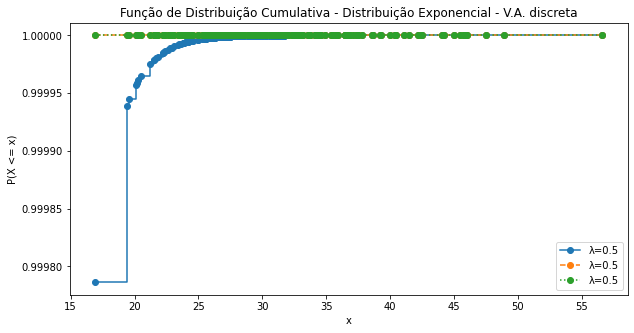

In [8]:
exp_cdf(derrames["bmi"].sort_values(ascending=True), True)

Aqui podemos ver que a distribuição exponencial não funcionou bem com essa base de dados. Mais a baixo você poderá ver com uma distribuição normal funciona melhor nesse caso

#### Distribuição Exponencial Sandbox

Aqui está um exemplo de uso com uma entrada de dados mais customizavel da CDF, caso queira brincar com os dados de entrada, é só modificar o código abaixo

##### Variáveis Discretas:

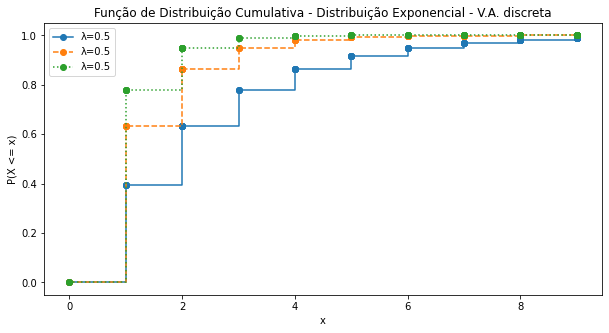

In [9]:
va_discreta = True
cdf_dataset = np.random.randint(0,10,50)
cdf_dataset.sort()
exp_cdf(cdf_dataset, va_discreta)

##### Variáveis Contínuas:

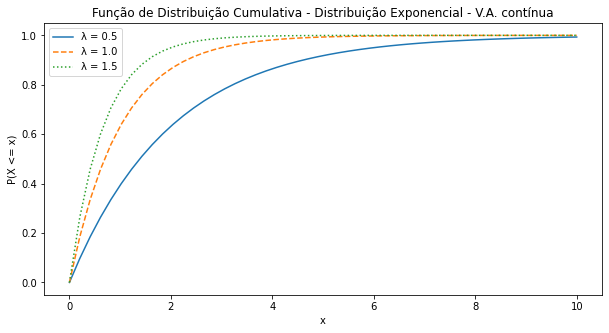

In [10]:
va_discreta = False
cdf_dataset = np.linspace(0,10,50)
exp_cdf(cdf_dataset, va_discreta)

### CDF "padrão"

In [11]:
def cdf(dados,va_discreta):
    if va_discreta:
        num_bins=10
        hx, hy, _ = plt.hist(dados, bins=num_bins, density=True, cumulative=True, histtype='step')
        plt.close()
        dx = hy[1] - hy[0]
        F1 = np.cumsum(hx)*dx
        fig, ax = plt.subplots(figsize=(10,5))
        ax.step(hy[1:], hx, '--o', where="post")
        ax.set_title('Função de Distribuição Cumulativa - V.A. discreta')
        ax.set_xlabel("x")
        ax.set_ylabel("P(X <= x)")
        plt.show()
    else:
        dx = dados[2]-dados[1]
        y  = 0.25*np.exp((-dados ** 2)/8)
        y=y/ (np.sum(dx * y))
        cdf = np.cumsum(y * dx)
        plt.plot(dados,cdf)
        plt.xlabel("x")
        plt.ylabel("P(X <= x)")
        plt.title("Função de Distribuição Cumulativa - V.A. contínua")
        plt.show()

#### Utilizando Dataset do arquivo csv na CDF

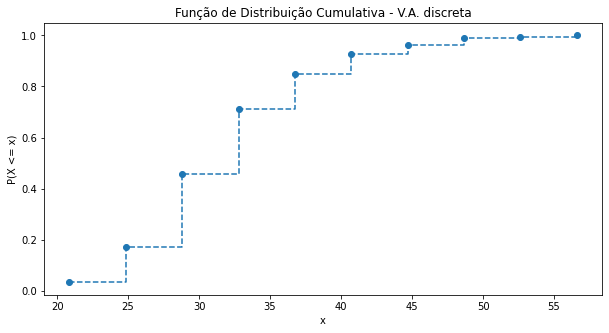

In [12]:
cdf(derrames["bmi"],True)

Seguindo o mesmo exemplo utilizado na seção da distribuição exponencial. Aqui podemos ver a relção do índice de massa corporal em pessoas que tiveram pelo menos 1 derrame. Pessoas com imc de 35 representam mais da metade desse grupo.

#### Distribuição Normal Sandbox

Aqui está um exemplo de uso com uma entrada de dados mais customizavel da CDF, caso queira brincar com os dados de entrada, é só modificar o código abaixo

##### Variáveis Discretas:

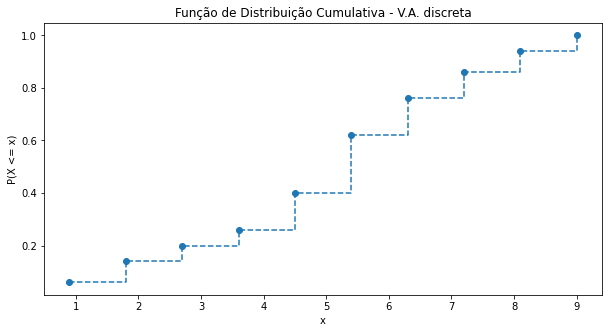

In [13]:
va_discreta = True
cdf_dataset = np.random.randint(0,10,50)
cdf(cdf_dataset,va_discreta)

##### Variáveis Contínuas:

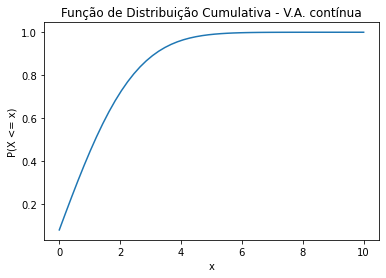

In [14]:
cdf_dataset = np.linspace(0,10,50)
va_discreta = False
cdf(cdf_dataset,va_discreta)

-----------------------------------------------------------------
## Função de Massa de Probabilidade - Variáveis Discretas

Associa cada valor de uma v.a. (eixo x) a uma probabilidade (eixo y)

In [15]:
def pmf(dados):
    val, cnt = np.unique(dados, return_counts=True)
    pmf = cnt / len(dados)
    # values along with probability mass function
    np.column_stack((val, pmf))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(val, pmf, 'k^')
    ax.vlines(val, 0, pmf, colors='k', linestyles='-', lw=1)
    ax.set_title("Função de Massa de Probabilidade")
    ax.set_xlabel('x')
    ax.set_ylabel("P(x)")
    plt.show()

#### Utilizando Dataset do arquivo csv na PMF

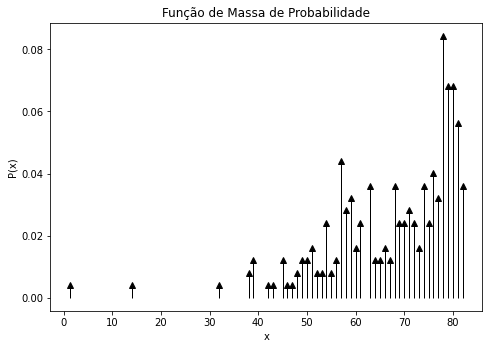

In [16]:
pmf(derrames["age"])

Aqui podemos ver um aumento notável do risco de pessoas ácima de 45 anos sofrerem um derrame.

#### PMF sandbox

Aqui está um exemplo de uso com uma entrada de dados mais customizavel da PMF, caso queira brincar com os dados de entrada, é só modificar o código abaixo

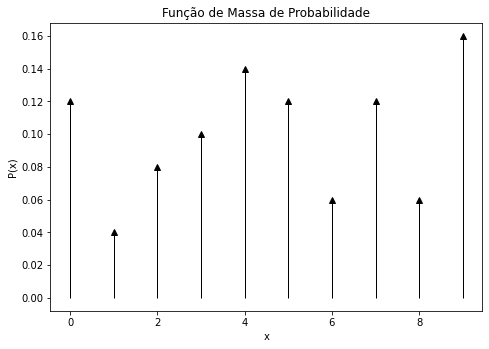

In [17]:
pmf_dataset = np.random.randint(0,10,50)
pmf(pmf_dataset)

-----------------------------------------------------------------
## Função Densidade de Probabilidade - Distribuição Exponencial - Variáveis Contínuas (EXTRA)

$f_X (x) = \Bigg\{$ 
$\begin{gather*} 
e^{(-\lambda x)}\textrm{, }x\geq0\textrm{ e }\lambda>0\\
0\textrm{, caso contrário}
\end{gather*}$

In [18]:
def exp_pdf_eq(lam, x):
    if(x>=0 and lam>0):
        return np.exp(-lam*x)
    else:
        return 0;

In [19]:
def exp_pdf(dados):
    lam = 0.5;
    y_vals1 = np.array([exp_pdf_eq(lam, x) for x in dados])
    lam = 1;
    y_vals2 = np.array([exp_pdf_eq(lam, x) for x in dados])
    lam = 1.5;
    y_vals3 = np.array([exp_pdf_eq(lam, x) for x in dados])

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(dados, y_vals1, label="\u03BB=0.5", linestyle='-')
    ax.plot(dados, y_vals2, label="\u03BB=1.0", linestyle='--')
    ax.plot(dados, y_vals3, label="\u03BB=1.5", linestyle=':')
    ax.set_title("Função de Massa de Probabilidade - Distribuição Exponencial - V.A. Contínua")
    ax.set_xlabel('x')
    ax.set_ylabel("P(X <= x)")
    plt.legend()

#### PDF Sandbox

Aqui está um exemplo de uso com uma entrada de dados mais customizavel da PDF, caso queira brincar com os dados de entrada, é só modificar o código abaixo

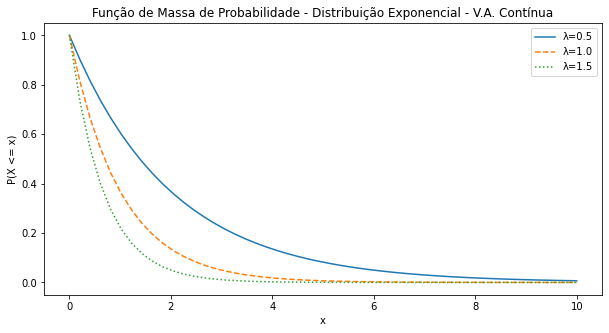

In [20]:
pdf_dataset = np.linspace(0,10,50)
exp_pdf(pdf_dataset)

-----------------------------------------------------------------
# Parte 2

-----------------------------------------------------------------
## CDF - Distribuição Normal

#### Utilizando Dataset do arquivo csv na CDF

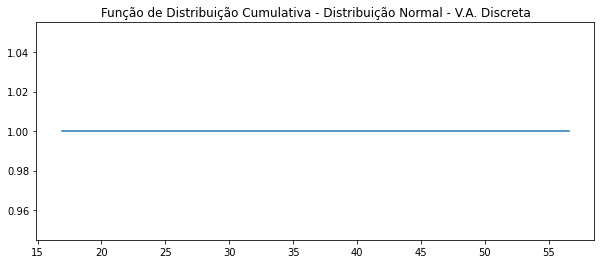

In [21]:
y = norm.cdf(derrames["bmi"].sort_values(ascending=True))
plt.subplots(figsize=(10,4))
plt.plot(derrames["bmi"].sort_values(ascending=True), y)
plt.title('Função de Distribuição Cumulativa - Distribuição Normal - V.A. Discreta')
plt.show()

#### CDF Sandbox

Aqui está um exemplo de uso com uma entrada de dados mais customizavel da CDF, caso queira brincar com os dados de entrada, é só modificar o código abaixo

##### Variáveis Discretas:

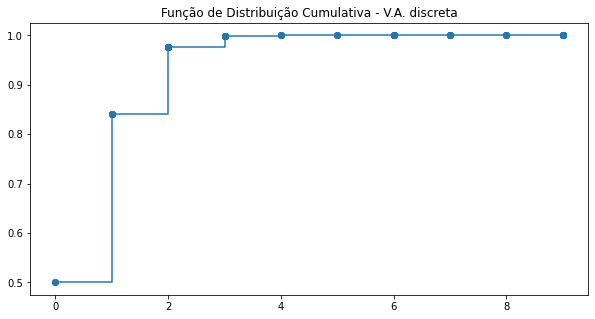

In [22]:
cdf_dataset = np.random.randint(0,10,50)
cdf_dataset.sort()
y = norm.cdf(cdf_dataset)
plt.subplots(figsize=(10,5))
plt.step(cdf_dataset, y, marker="o", where='post')
plt.title('Função de Distribuição Cumulativa - V.A. discreta')
plt.show()

##### Variáveis Contínuas:

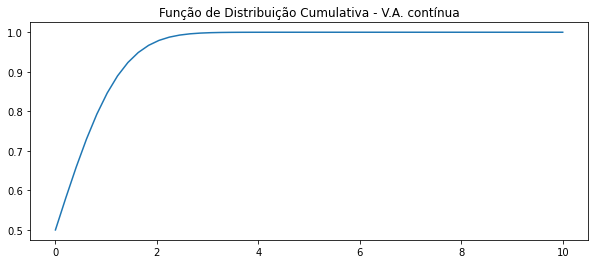

In [23]:
cdf_dataset = np.linspace(0,10,50)
y = norm.cdf(cdf_dataset)
plt.subplots(figsize=(10,4))
plt.plot(cdf_dataset, y)
plt.title('Função de Distribuição Cumulativa - V.A. contínua')
plt.show()

-----------------------------------------------------------------
## PDF - Distribuição Normal

#### Utilizando Dataset do arquivo csv na PDF

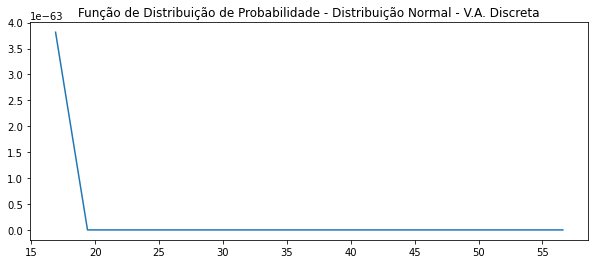

In [24]:
y = norm.pdf(derrames["bmi"].sort_values(ascending=True))
plt.subplots(figsize=(10,4))
plt.plot(derrames["bmi"].sort_values(ascending=True), y)
plt.title('Função de Distribuição de Probabilidade - Distribuição Normal - V.A. Discreta')
plt.show()

#### PDF Sandbox

Aqui está um exemplo de uso com uma entrada de dados mais customizavel da PDF, caso queira brincar com os dados de entrada, é só modificar o código abaixo

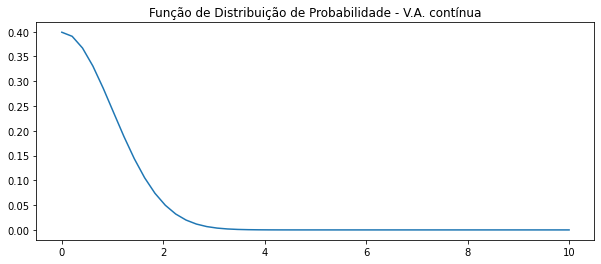

In [25]:
pdf_dataset = np.linspace(0,10,50)
y = norm.pdf(pdf_dataset)
plt.subplots(figsize=(10,4))
plt.plot(pdf_dataset, y)
plt.title('Função de Distribuição de Probabilidade - V.A. contínua')
plt.show()

-----------------------------------------------------------------
## PMF - Distribuição Binomial

#### Utilizando Dataset do arquivo csv na PMF

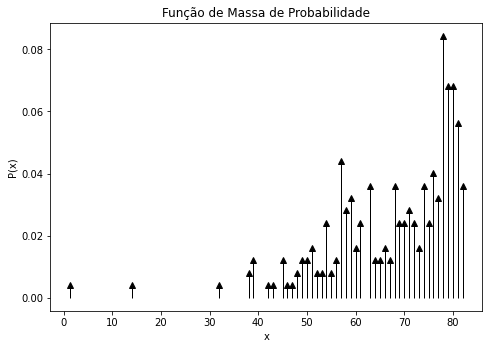

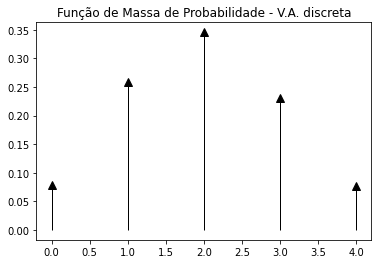

In [26]:
pmf(derrames["age"])
fig, ax = plt.subplots(1, 1)
# Calculate a few first moments:
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# Display the probability mass function (pmf):
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'k^', ms=8)

# Alternatively, the distribution object can be called (as a function) to fix the shape and location.
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1)
plt.title('Função de Massa de Probabilidade - V.A. discreta')
plt.show()

#### PMF Sandbox

Aqui está um exemplo de uso com uma entrada de dados mais customizavel da PMF, caso queira brincar com os dados de entrada, é só modificar o código abaixo

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

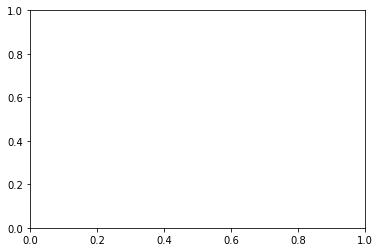

In [37]:
# Lançamento de moeda
# Probabilidade de se obter 'c' caras depois de 'n' jogadas com uma moeda justa, p = 0.5
c = 2
n = 5
p = 0.4
dist = binom(n,p)
prob = binom.pmf(c, n, p)
x = np.arange(binom.ppf(0, n, p), binom.ppf(1, n, p))

fig, ax = plt.subplots(1, 1)
ax.plot(x, prob, 'k^', ms=8)

dist = binom(n,p)
ax.vlines(x, 0, dist.pmf(x), colors='k', linestyles='-', lw=1)
plt.title('Função de Massa de Probabilidade - V.A. discreta')
plt.show()

# Calculate a few first moments:
# n, p = 5, 0.4
# mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# Display the probability mass function (pmf):
# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
# ax.plot(x, prob, 'k^', ms=8)

# Alternatively, the distribution object can be called (as a function) to fix the shape and location. This returns a “frozen” RV object holding the given parameters fixed. Freeze the distribution and display the frozen pmf:
# rv = binom(n, p)
# ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1)
# plt.title('Função de Massa de Probabilidade - V.A. discreta')
# plt.show()